# 1. Import the Libraries

In [107]:
#installment packages

import pandas as pd
import numpy as np 

# Importing visualization libraries
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE


from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn import cluster 
from sklearn.cluster import SpectralClustering



import warnings
warnings.filterwarnings("ignore")


# 2. Load the dataset

In [108]:
#reading the CSV file into pandas dataframe
data = pd.read_excel("Credit Card Customer Data.xlsx")

In [109]:
#Check top few records of the dataset
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


* It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
* All the records are numeric.

In [110]:
#Check the last few records of the dataset
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


# 3. Exploratory data quality report

## 3.1. Univariate analysis

### Data Types and Description

In [111]:
#To show the detailed summary 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [112]:
# Data types information
data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

* It gives the data types of each column of the dataset.

In [113]:
#To get the shape 
data.shape

(660, 7)

In [114]:
#To get the columns name
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

* It gives the column names of the dataset.

In [115]:
#Analyze the distribution of the dataset
data.describe().T

,count,mean,std,...,50%,75%,max
Sl_No,660.0,330.500000,190.669872,...,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,...,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,...,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,...,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,...,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,...,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,...,3.0,5.00,10.0


* It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.


### CHECKING NULLS



In [116]:
# Checking nulls
data.isnull().sum()
# We have nulls in credit limit and minimum payments
# I will imput the values later.

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

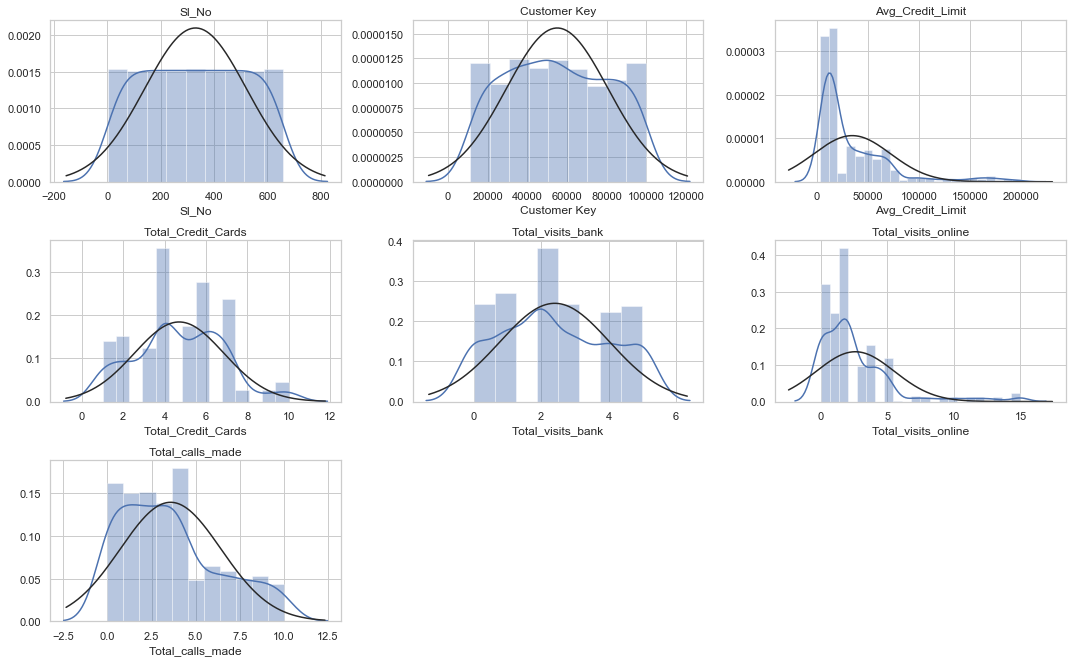

In [117]:
#A quick check on vriables

from scipy.stats import norm 

graph_by_variables = ['Sl_No', 'Customer Key', 'Avg_Credit_Limit','Total_Credit_Cards',
             'Total_visits_bank', 'Total_visits_online','Total_calls_made']
plt.figure(figsize=(15,18))

for i in range(0,7):
    plt.subplot(6,3,i+1)
    sns.distplot(data[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

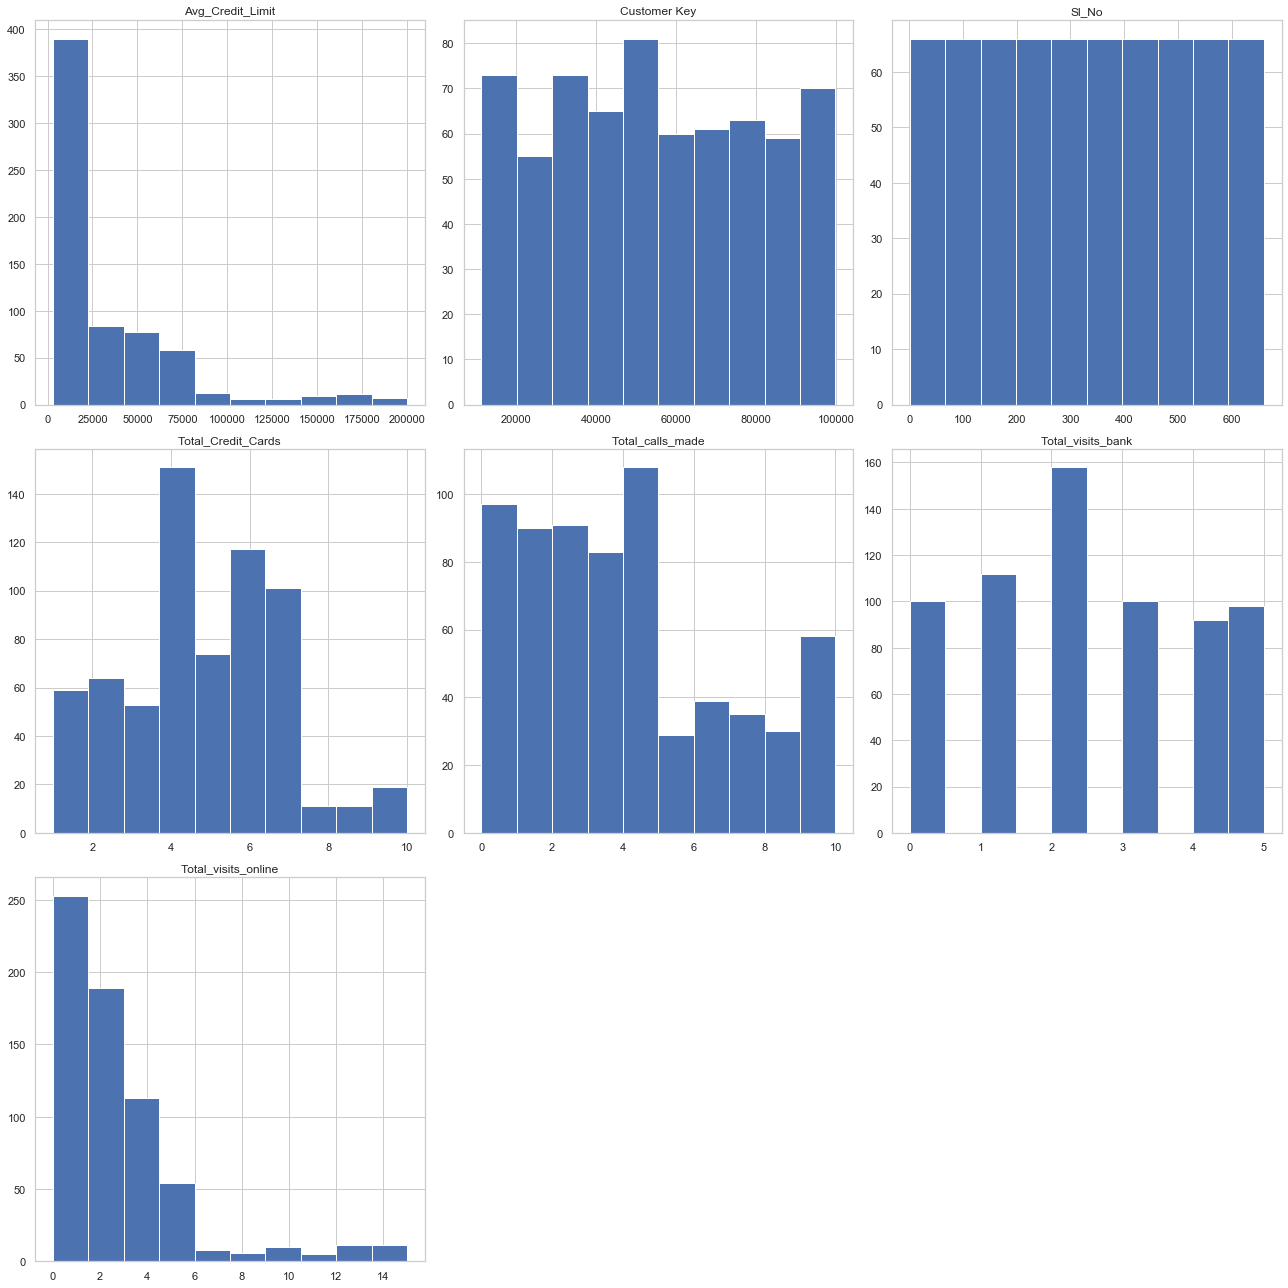

In [118]:
#Frequency variables in charts

data[['Sl_No', 'Customer Key', 'Avg_Credit_Limit','Total_Credit_Cards',
             'Total_visits_bank', 'Total_visits_online','Total_calls_made']].hist(figsize=(18,18))
plt.tight_layout()

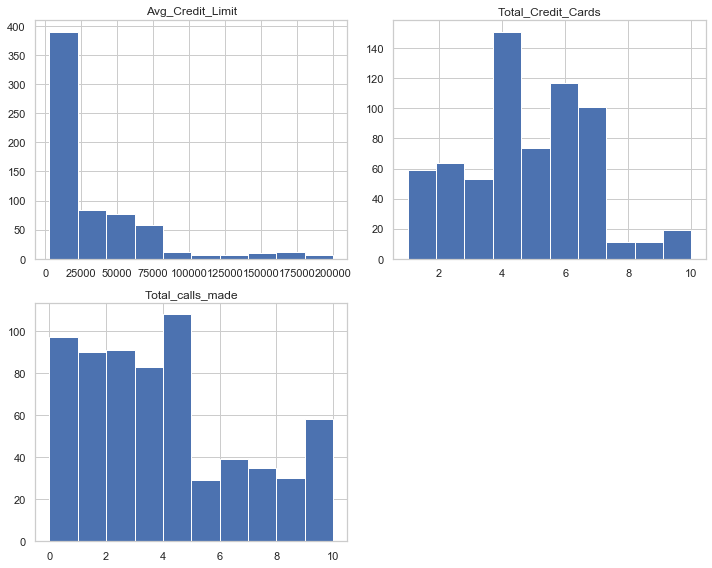

In [119]:
#int. values in histogram

data[['Total_calls_made','Total_Credit_Cards', 'Avg_Credit_Limit']].hist(figsize=(10,8))
plt.tight_layout()

Text(0.5, 1, 'Correlation Matrix')

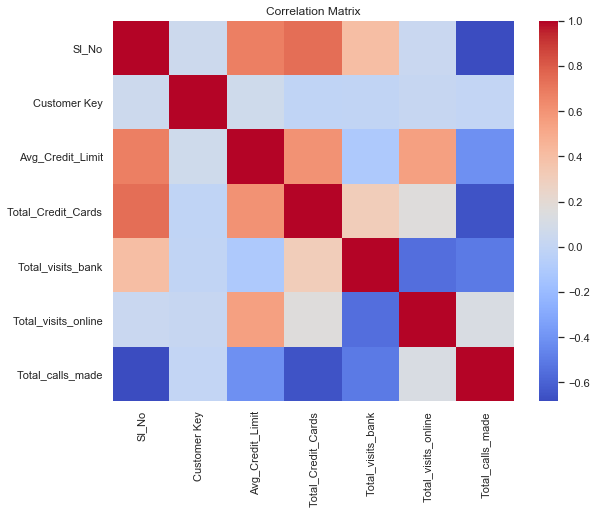

In [120]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

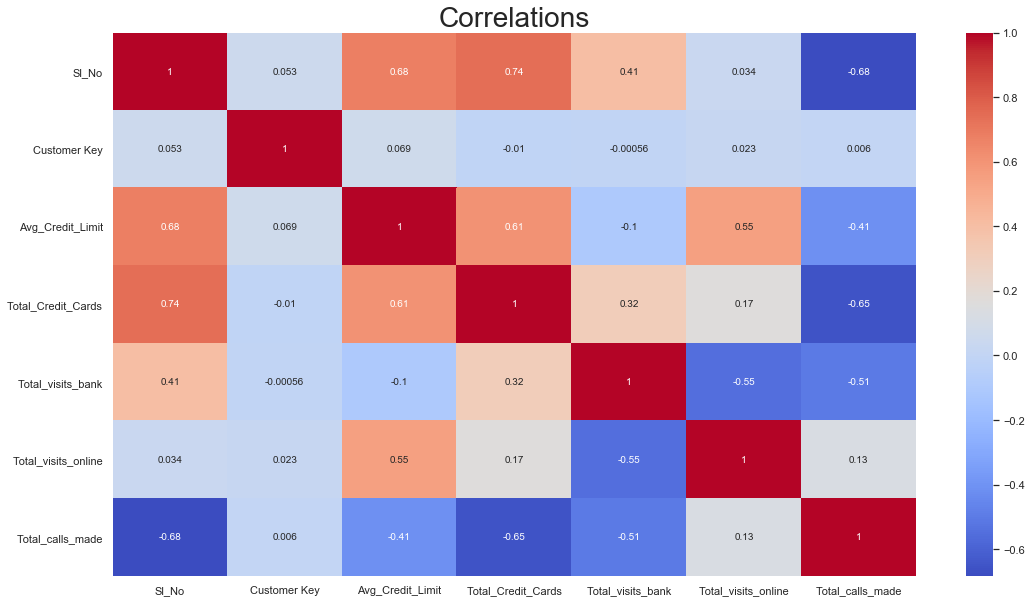

In [121]:
#Lets take a look at how the  variables are correlated
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True);
plt.title('Correlations', size = 28);

### Clustering Methods


In [122]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

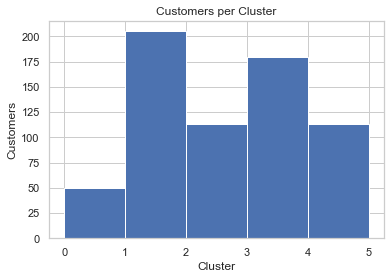

In [123]:
# Custumers per cluster

n_clusters = 5

clustering = KMeans(n_clusters=n_clusters,
                    random_state=0
                   )

cluster_labels = clustering.fit_predict(data_std)

# plot cluster sizes

plt.hist(cluster_labels, bins=range(n_clusters+1))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

In [124]:
wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(data_std)
    wcss.append(kmeans.inertia_)

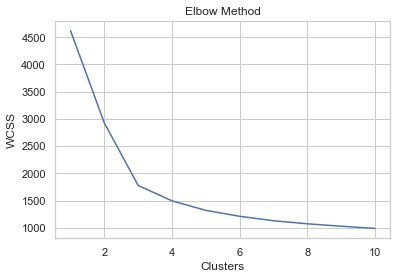

In [125]:
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

SyntaxError: invalid syntax (<ipython-input-129-827e303c0e61>, line 5)

## K-MEANS CLUSTERING

#### CALCULATING THE OPTIMAL NUMBER OF CLUSTERS

In [42]:
# K MEANS  CLUSTERING
# Before using K means, i am going to determine the optimal number of clusters
# i will use the Elbow method to find a good number of clusters
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data)
    inertia.append(np.sqrt(kmeans.inertia_))

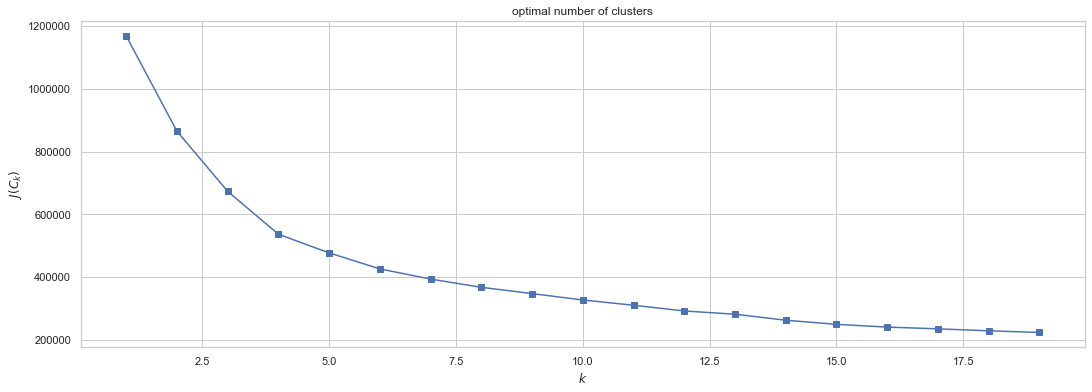

In [87]:
plt.figure(figsize=(18,6))
plt.title('optimal number of clusters')
plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

### CALCULATING K-MEANS AND THE CENTROIDS

In [44]:
# It seems that the optimal number of clusters is between 7.5  and 8.
# I am going to take 8 for the analysis
kmeans = KMeans(n_clusters=8)

In [45]:
# applying kmeans
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
# Calculating the centroids

centroids=kmeans.cluster_centers_
centroids

array([[2.51354839e+02, 5.76776452e+04, 1.51483871e+04, 3.94193548e+00,
        2.22580645e+00, 2.19354839e+00, 4.23870968e+00],
       [6.34555556e+02, 3.20957778e+04, 1.54277778e+05, 8.77777778e+00,
        5.55555556e-01, 1.07777778e+01, 7.77777778e-01],
       [4.93024390e+02, 5.38658537e+04, 7.89512195e+04, 6.48780488e+00,
        2.36585366e+00, 4.00000000e+00, 1.78048780e+00],
       [4.81587500e+02, 3.34959375e+04, 4.87000000e+04, 5.38750000e+00,
        3.22500000e+00, 1.12500000e+00, 2.13750000e+00],
       [2.16898734e+02, 2.66408924e+04, 1.29113924e+04, 3.96202532e+00,
        2.27848101e+00, 2.36075949e+00, 4.56329114e+00],
       [5.08521127e+02, 8.31623521e+04, 5.68450704e+04, 5.87323944e+00,
        3.40845070e+00, 1.18309859e+00, 2.16901408e+00],
       [6.38117647e+02, 8.39738824e+04, 1.64529412e+05, 8.52941176e+00,
        6.47058824e-01, 1.12941176e+01, 1.17647059e+00],
       [2.31533333e+02, 8.70506250e+04, 1.40666667e+04, 3.76666667e+00,
        2.19166667e+00, 2

In [47]:
# Creating a dataframe for the centroids
centroids=kmeans.cluster_centers_
index=['C0','C1','C2','C3','C4','C5','C6','C7']
columns=data.columns
centroid_data=pd.DataFrame(centroids,index,columns)
centroid_data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
C0,251.354839,57677.645161,15148.387097,3.941935,2.225806,2.193548,4.238710
C1,634.555556,32095.777778,154277.777778,8.777778,0.555556,10.777778,0.777778
C2,493.024390,53865.853659,78951.219512,6.487805,2.365854,4.000000,1.780488
C3,481.587500,33495.937500,48700.000000,5.387500,3.225000,1.125000,2.137500
C4,216.898734,26640.892405,12911.392405,3.962025,2.278481,2.360759,4.563291
C5,508.521127,83162.352113,56845.070423,5.873239,3.408451,1.183099,2.169014
C6,638.117647,83973.882353,164529.411765,8.529412,0.647059,11.294118,1.176471
C7,231.533333,87050.625000,14066.666667,3.766667,2.191667,2.358333,4.625000


### ADDING THE LABELS TO THE DATASET

In [48]:
#Adding the clusters to the dataframe
data['cluster']=list(kmeans.labels_)

In [49]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,...,Total_visits_online,Total_calls_made,cluster
0,1,87073,100000,...,1,0,2
1,2,38414,50000,...,10,9,3
2,3,17341,50000,...,3,4,3
3,4,40496,30000,...,1,4,3
4,5,47437,100000,...,12,3,2


### VISUALIZING THE CUSTOMER SEGMENTATION


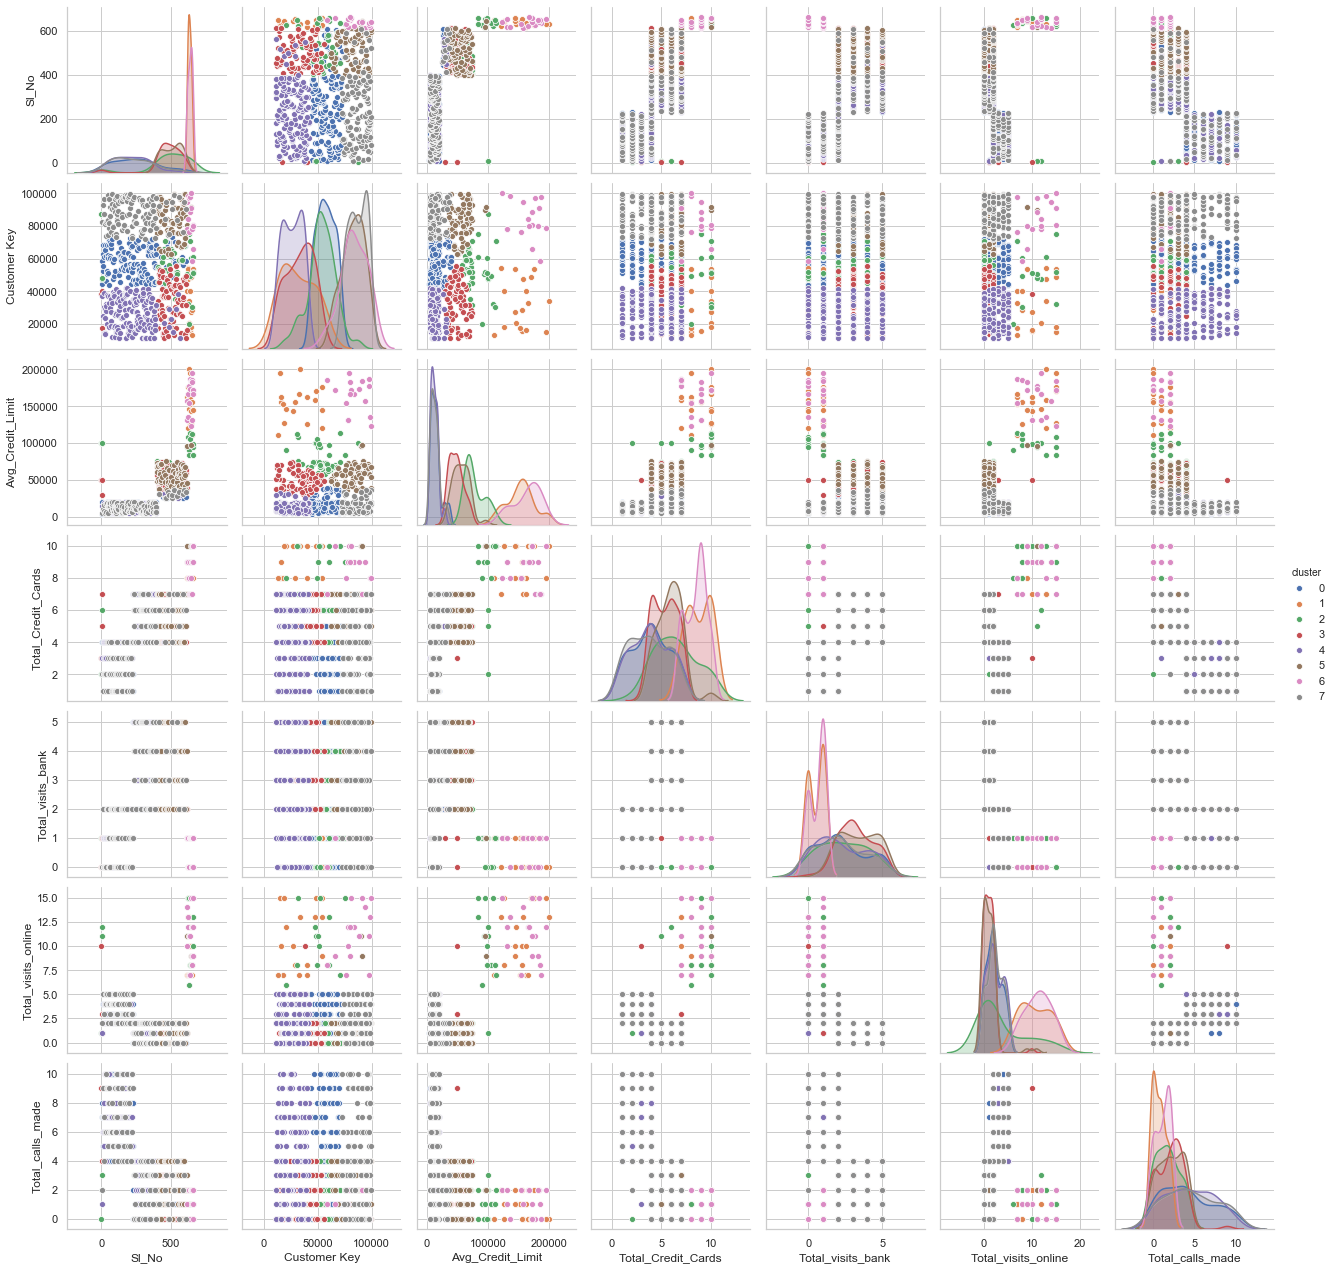

In [50]:
sns.pairplot( data, hue="cluster")


### REFINING THE APPROACH THROUGH ITERATION

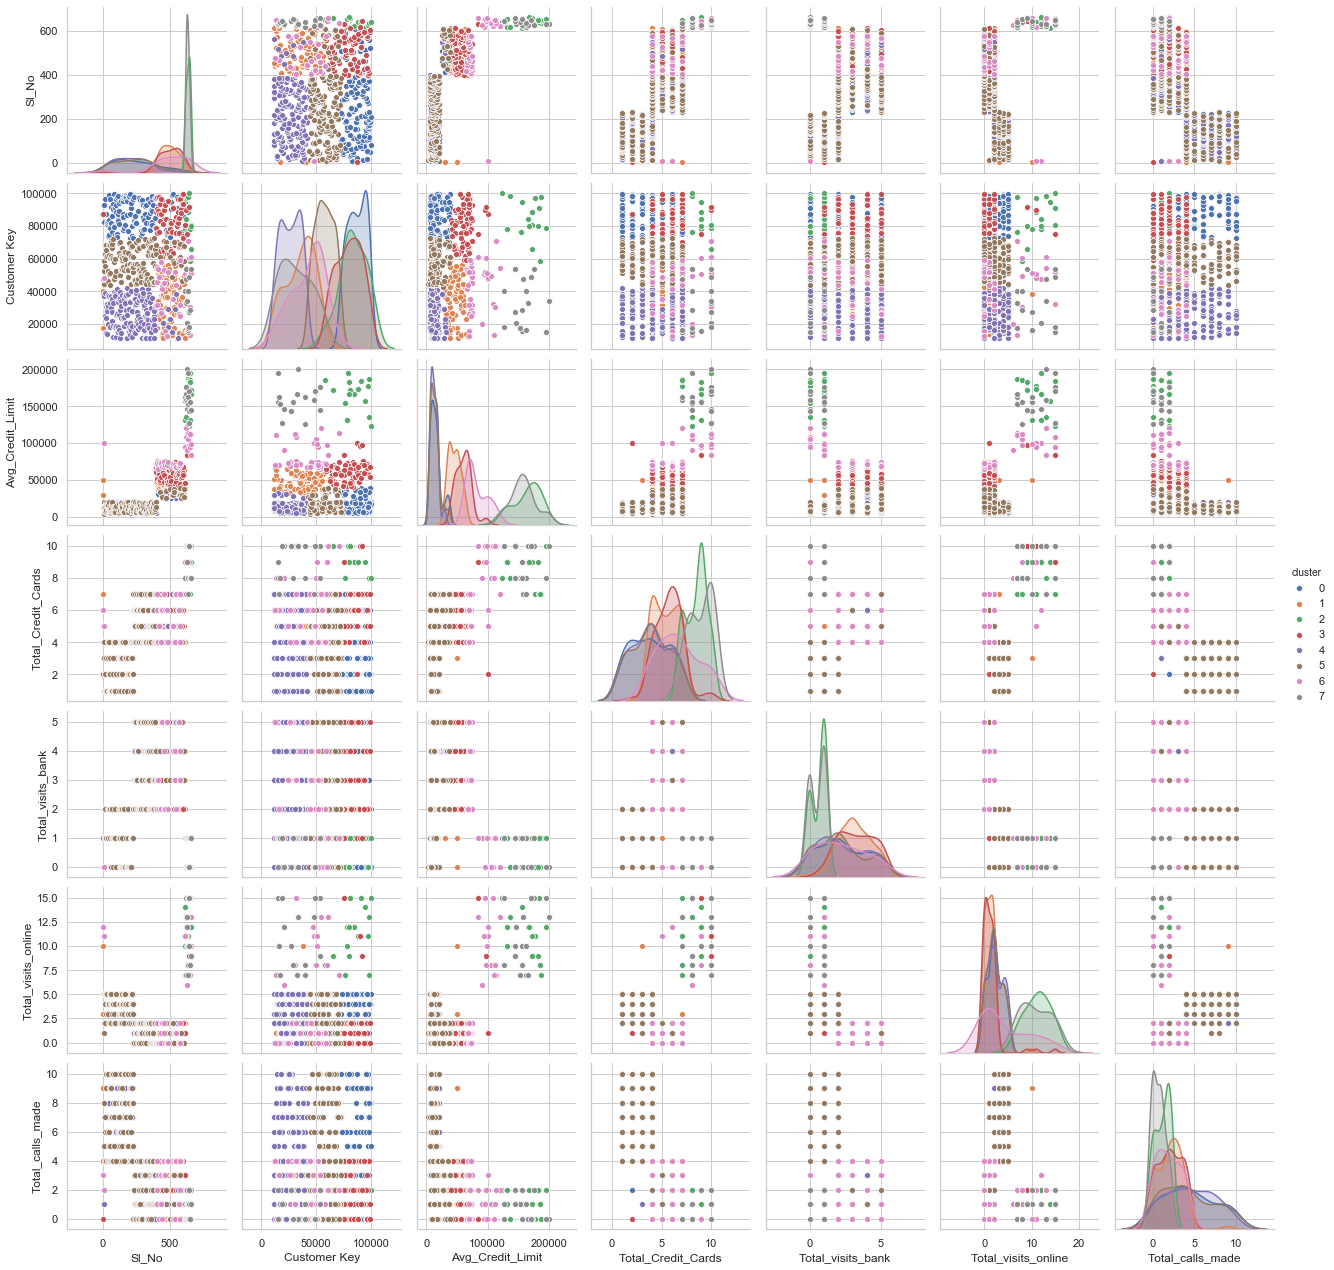

In [51]:
# VISUALIZING,DESCRIBING AND EXPLAINING THE CLUSTERS

best_cols = ["Sl_No", "Customer Key", "Avg_Credit_Limit","Total_Credit_Cards",
             "Total_visits_bank", "Total_visits_online","Total_calls_made" ]

kmeans = KMeans(n_clusters=8, init="k-means++", n_init=10, max_iter=300) 
best_vals = data[best_cols].iloc[ :, :].values
y_pred = kmeans.fit_predict( best_vals )

data["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( data[ best_cols ], hue="cluster");

### CLUSTERS EXPLANATION AND MARKETING STRATEGY

4    158
5    151
0    127
1     79
3     76
6     36
2     17
7     16
Name: cluster, dtype: int64

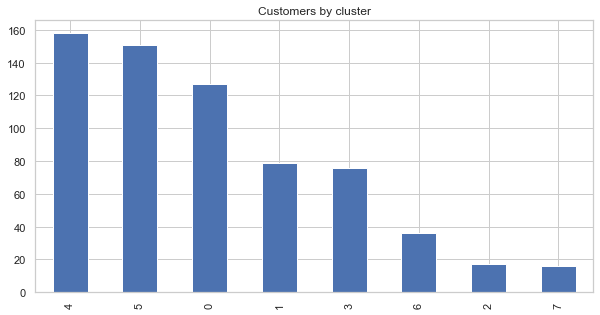

In [52]:
# Number of clients by cluster
data['cluster'].value_counts().plot.bar(figsize=(10,5), title='Customers by cluster');

data['cluster'].value_counts()

In [53]:
# Creating a dataframe for the centroids
centroids=kmeans.cluster_centers_
index=['C0','C1','C2','C3','C4','C5','C6','C7']
columns=["Sl_No", "Customer Key", "Avg_Credit_Limit","Total_Credit_Cards",
             "Total_visits_bank", "Total_visits_online","Total_calls_made" ]
centroid_data=pd.DataFrame(centroids,index,columns)
centroid_data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
C0,247.149606,87157.007874,15645.669291,3.866142,2.314961,2.259843,4.496063
C1,483.177215,35769.924051,46265.822785,5.417722,3.202532,1.164557,2.101266
C2,638.117647,83973.882353,164529.411765,8.529412,0.647059,11.294118,1.176471
C3,503.197368,80047.986842,60934.210526,5.776316,3.289474,1.328947,2.065789
C4,216.898734,26640.892405,12911.392405,3.962025,2.278481,2.360759,4.563291
C5,243.708609,57842.178808,14377.483444,3.927152,2.178808,2.245033,4.304636
C6,507.111111,42612.277778,83138.888889,6.694444,2.222222,4.500000,1.888889
C7,634.625000,31869.625000,159062.500000,8.937500,0.562500,10.875000,0.750000


### CLUSTER C0 PERSONA

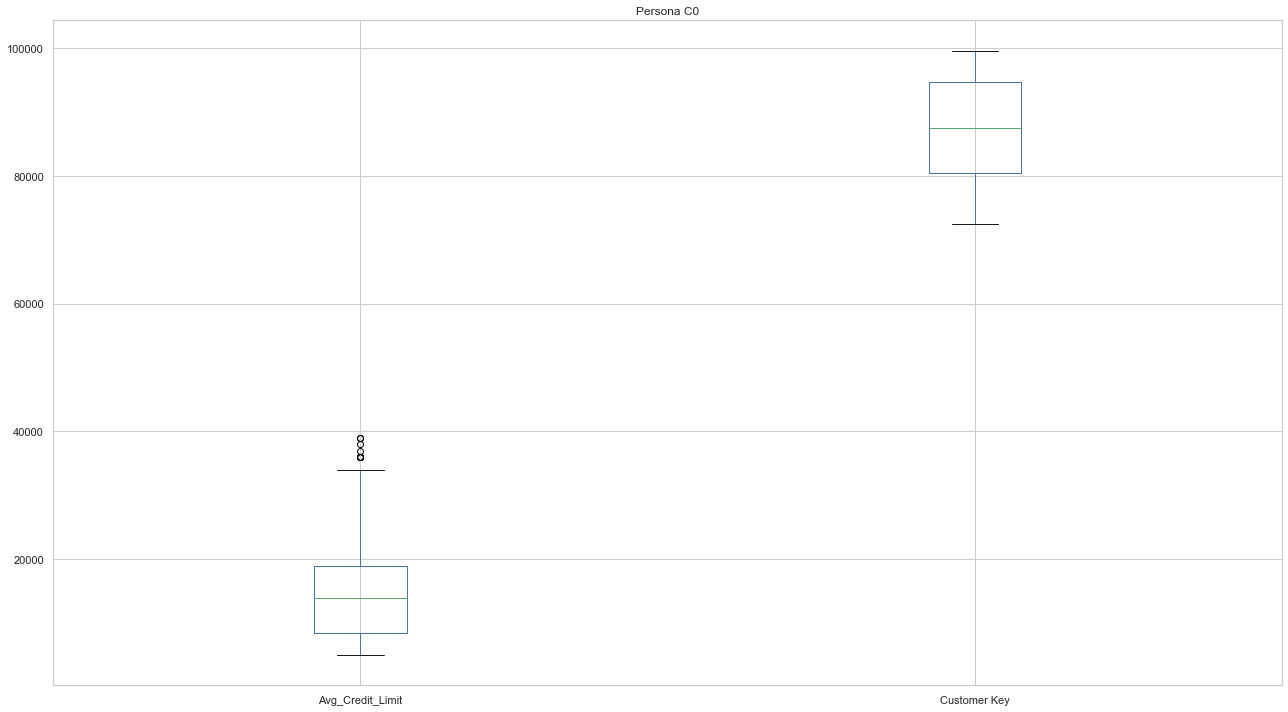

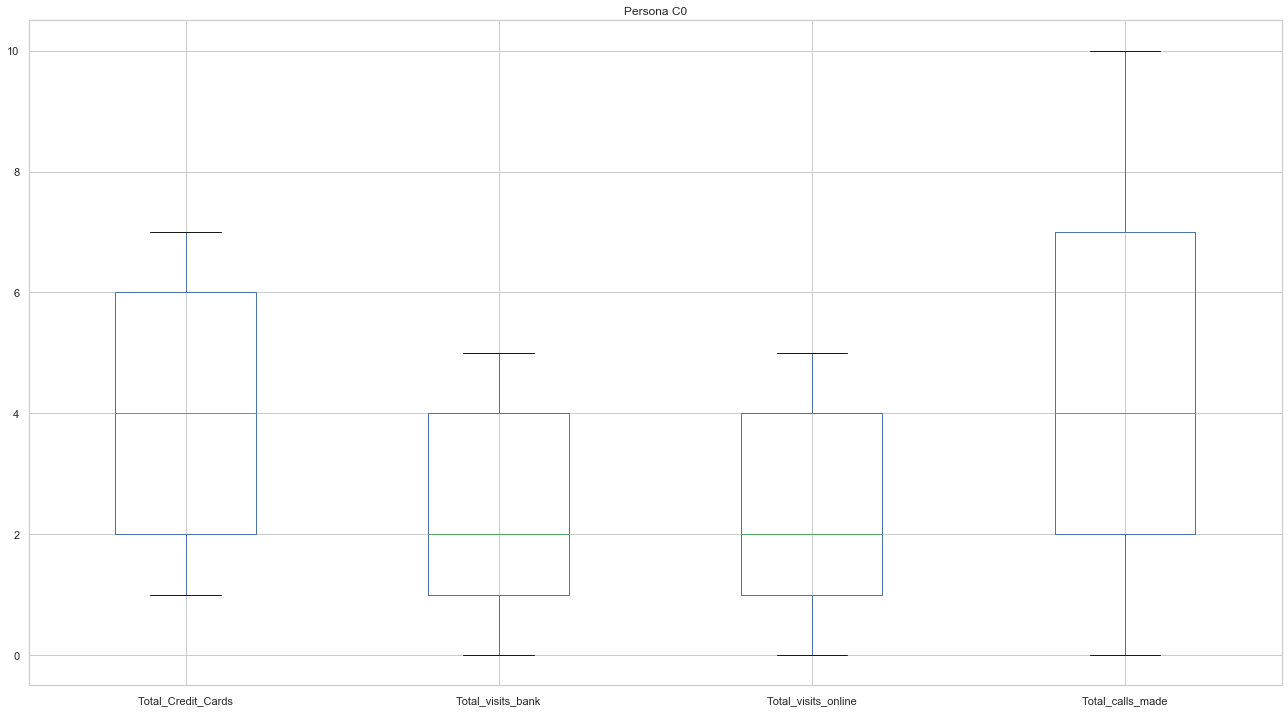

In [57]:
#let´s characterize the Persona in the Cluster CO
cluster_C0=data[data['cluster']==0]
cluster_C0[[ 'Avg_Credit_Limit', 'Customer Key']].plot.box(figsize=(18,10),by='cluster',title='Persona C0',legend=True);
plt.tight_layout()
cluster_C0[['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online' , 'Total_calls_made']].plot.box(figsize=(18,10),title='Persona C0',legend=True);
plt.tight_layout()

#### CLUSTER C1 PERSONA

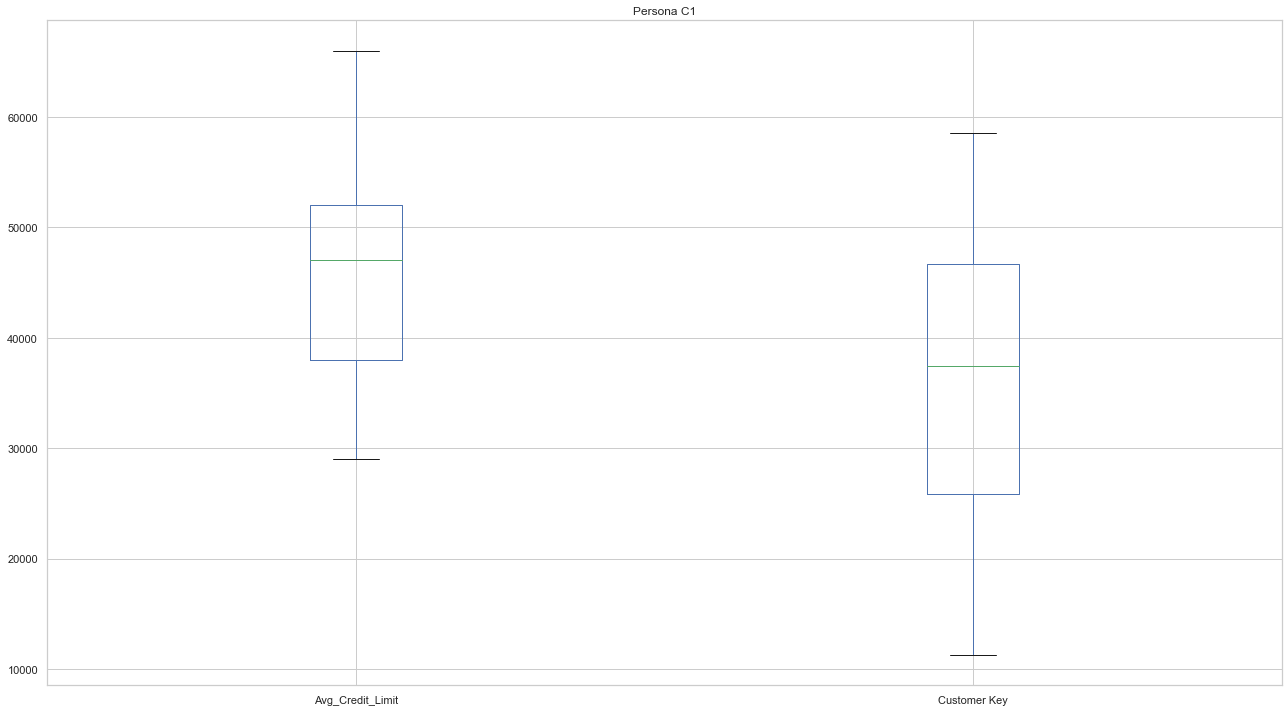

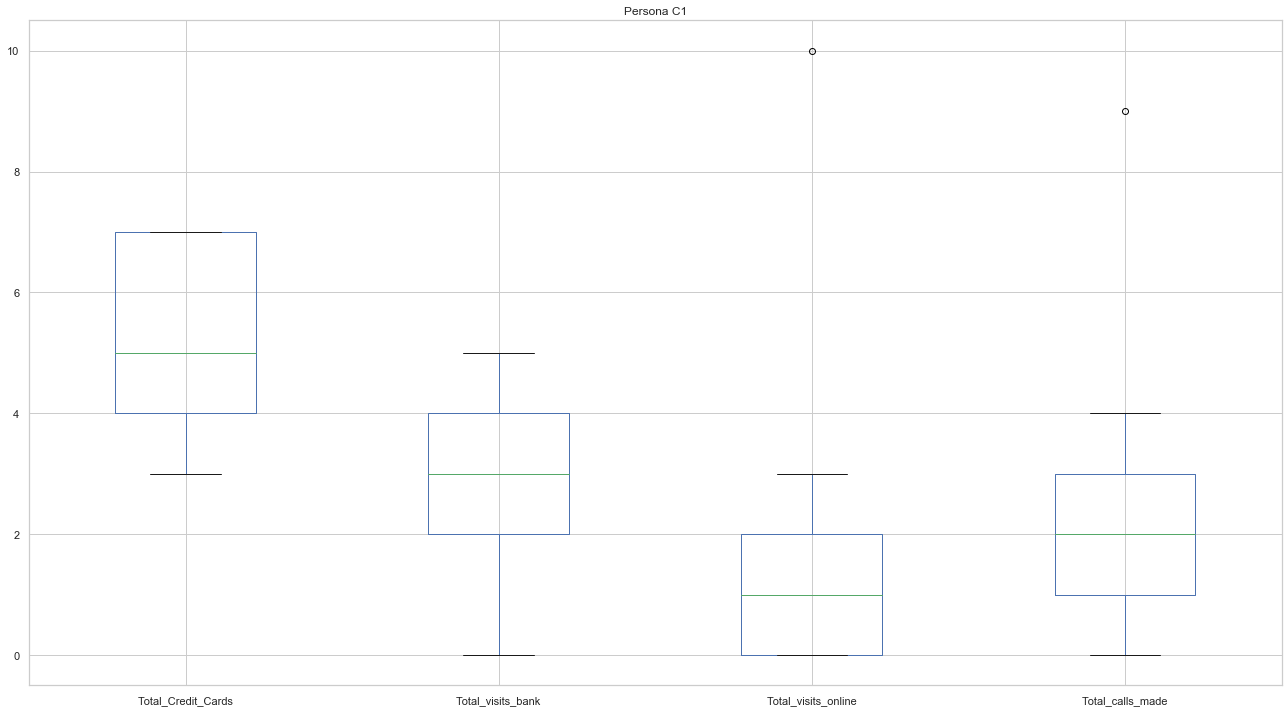

In [58]:
#let´s characterize the Persona in the Cluster C1
cluster_C1=data[data['cluster']==1]
cluster_C1[['Avg_Credit_Limit', 'Customer Key']].plot.box(figsize=(18,10),by='cluster',title='Persona C1',legend=True);
plt.tight_layout()
cluster_C1[['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online' , 'Total_calls_made']].plot.box(figsize=(18,10),title='Persona C1',legend=True);
plt.tight_layout()

#### CLUSTER C2 PERSONA

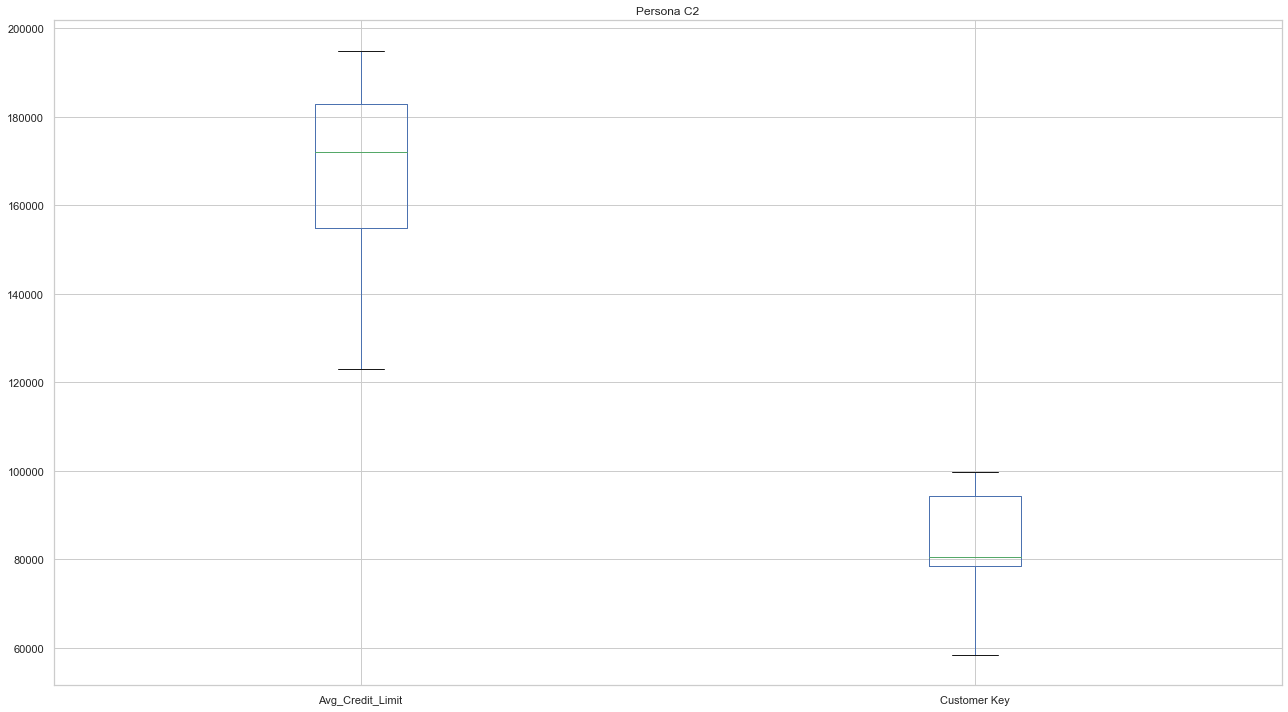

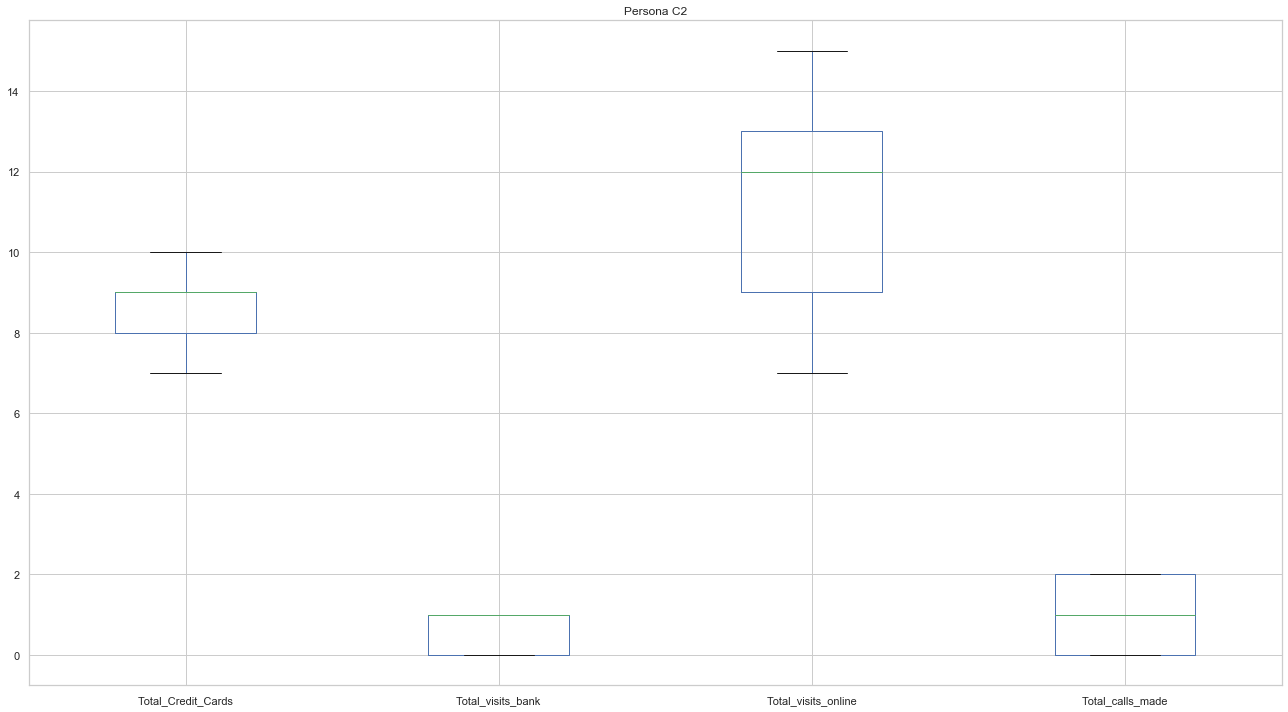

In [60]:
#let´s characterize the Persona in the Cluster C2
cluster_C2=data[data['cluster']==2]
cluster_C2[['Avg_Credit_Limit', 'Customer Key']].plot.box(figsize=(18,10),by='cluster',title='Persona C2',legend=True);
plt.tight_layout()
cluster_C2[['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online' , 'Total_calls_made']].plot.box(figsize=(18,10),title='Persona C2',legend=True);
plt.tight_layout()

#### CLUSTER C3 PERSONA

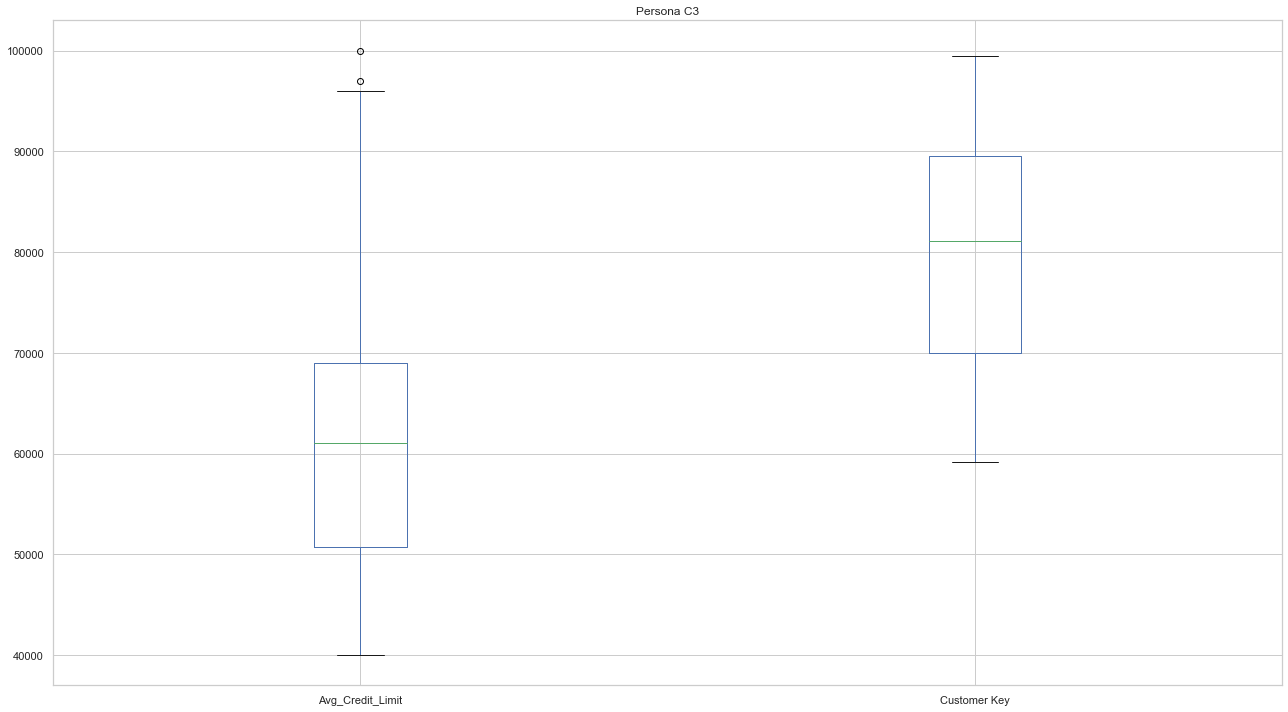

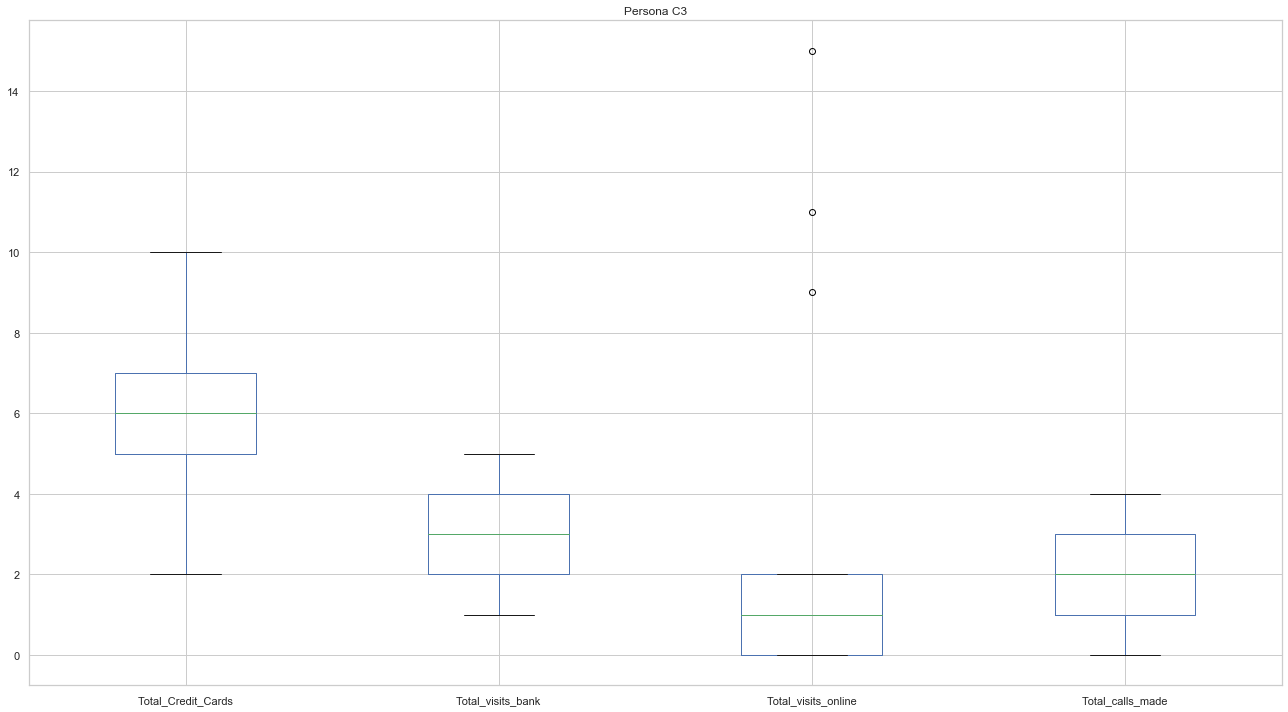

In [61]:
#let´s characterize the Persona in the Cluster C3
cluster_C3=data[data['cluster']==3]
cluster_C3[['Avg_Credit_Limit', 'Customer Key']].plot.box(figsize=(18,10),by='cluster',title='Persona C3',legend=True);
plt.tight_layout()
cluster_C3[['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online' , 'Total_calls_made']].plot.box(figsize=(18,10),title='Persona C3',legend=True);
plt.tight_layout()

##  Compering Results for the Optimal Number of Cluster Model


In [132]:
kmeans_      = KMeans(n_clusters=8, random_state=40).fit_predict(data_std)


In [133]:
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=7).fit_predict(data_std)

In [134]:
kmeansSilhouette_Score        = metrics.silhouette_score(data_std, kmeans_, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(data_std, hierarchical_, metric='euclidean')

In [135]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], 
                                ['Hierarchical',Hierarchical_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.305404
0,KMeans,0.230150


### Hierarchical Method Chart

In [136]:
data['cluster'] = hierarchical_ 

In [137]:
data['cluster'].value_counts()

1    384
4    221
0     48
2      3
6      2
5      1
3      1
Name: cluster, dtype: int64

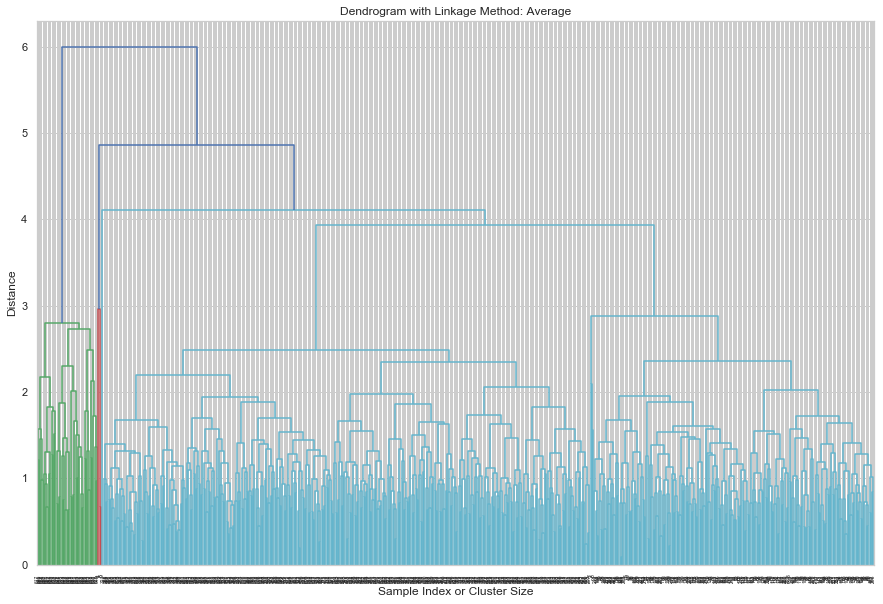

In [138]:
plt.figure(figsize=(15,10)) 
plt.title("Dendrogram with Linkage Method: Average") 
plt.xlabel('Sample Index or Cluster Size') 
plt.ylabel('Distance') 
          

dendrogram(linkage(data_std, method='average')) 
plt.show() 

## Kmeans Model with 3 Clusters

In [139]:
kmeans3_  = KMeans(n_clusters=3, random_state=40).fit(data_std)
data['cluster'] = kmeans3_.labels_

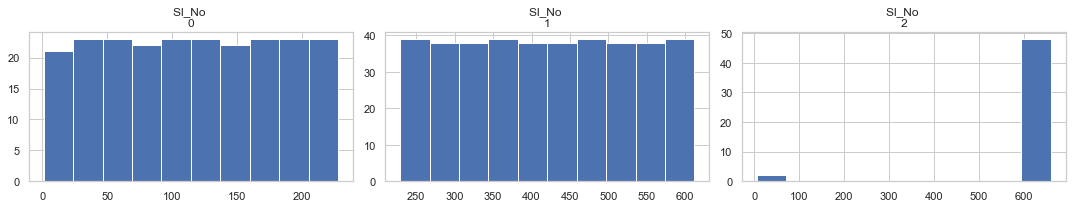

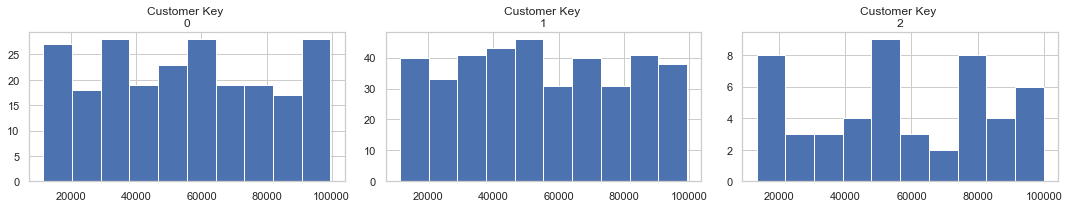

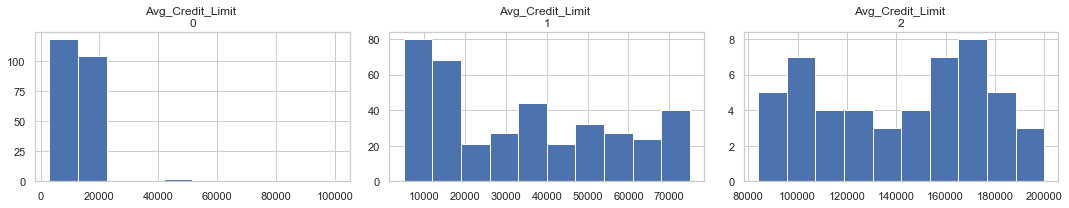

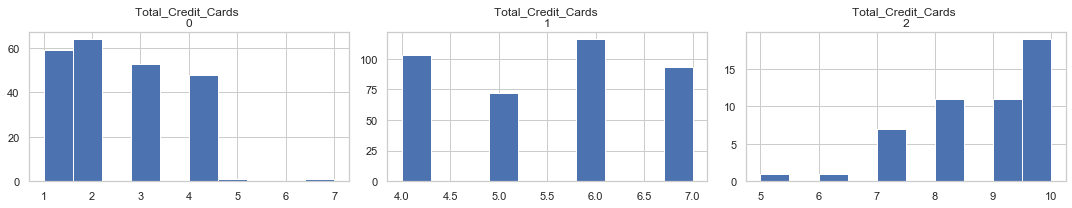

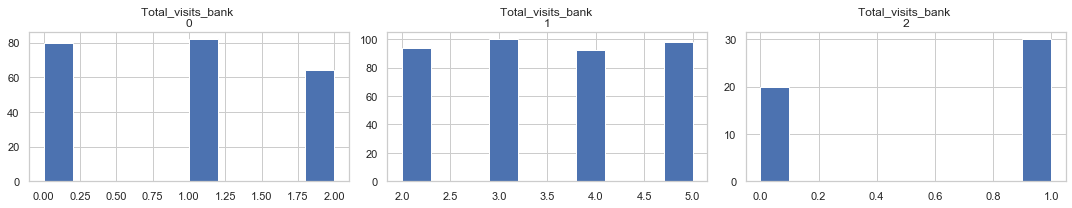

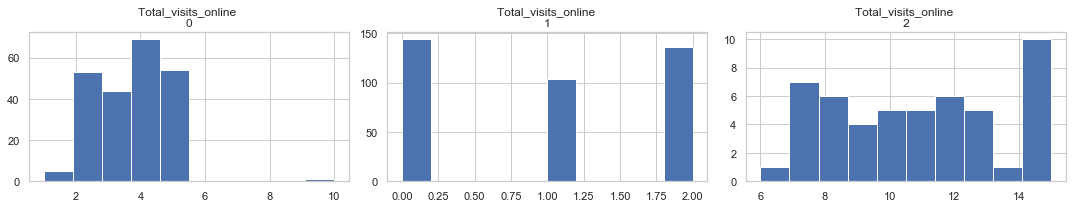

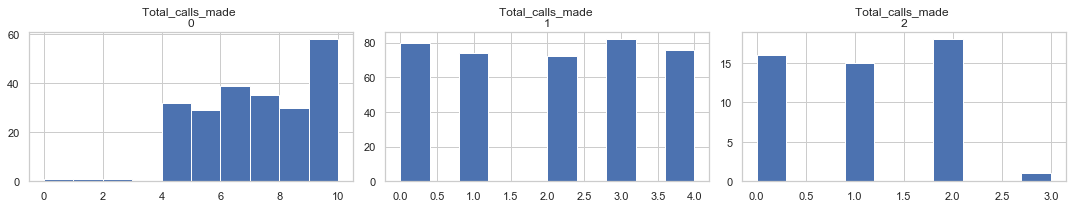

In [141]:
col_list= ['Sl_No', 'Customer Key', 'Avg_Credit_Limit','Total_Credit_Cards',
             'Total_visits_bank', 'Total_visits_online','Total_calls_made']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,3):
        plt.subplot(1,3,i+1)
        cluster = data[data['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()

# Conclusion

As per the business problem statement we have formed three clusters of different
channels so that based on different requirements the marketing team will target only
customers falling under a particular cluster rather than targeting all the customers.